In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  

In [61]:
train = train_gen.flow_from_directory('drive/MyDrive/data/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('drive/MyDrive/data/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


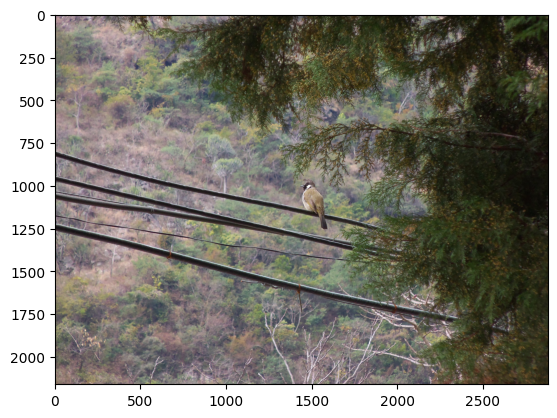

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = '/content/drive/MyDrive/data/train_data/train_data/himbul/100_5028.JPG'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [63]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [64]:
test.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [65]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [76]:
model = Sequential()

model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='softmax'))

In [77]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [80]:
model.fit(train,batch_size=8,validation_data=test,epochs=10,callbacks=early_stop)

Epoch 1/10
19/19 [==============================] - 137s 7s/step - loss: 2.8380 - accuracy: 0.0933 - val_loss: 2.7892 - val_accuracy: 0.1338
Epoch 2/10
19/19 [==============================] - 129s 7s/step - loss: 2.3558 - accuracy: 0.2467 - val_loss: 2.8401 - val_accuracy: 0.0955
Epoch 3/10
19/19 [==============================] - 136s 7s/step - loss: 2.1320 - accuracy: 0.3200 - val_loss: 2.9739 - val_accuracy: 0.0955
Epoch 4/10
19/19 [==============================] - 130s 7s/step - loss: 1.9067 - accuracy: 0.4133 - val_loss: 2.9667 - val_accuracy: 0.0955
Epoch 5/10
19/19 [==============================] - 130s 7s/step - loss: 1.7488 - accuracy: 0.5133 - val_loss: 2.9937 - val_accuracy: 0.1019
Epoch 6/10
19/19 [==============================] - 131s 7s/step - loss: 1.6982 - accuracy: 0.4800 - val_loss: 3.0451 - val_accuracy: 0.0955
Epoch 7/10
19/19 [==============================] - 131s 7s/step - loss: 1.5308 - accuracy: 0.5400 - val_loss: 3.1403 - val_accuracy: 0.0637
Epoch 8/10
19

In [81]:
model.save('birdClassifier1.h5')

In [82]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [90]:

img1 = image.load_img('/content/drive/MyDrive/data/train_data/train_data/himbul/100_5162.JPG',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
output=list(train.class_indices)
print(pred)
print(output[pred])

1/1 [==============================] - 0s 31ms/step
8
himgri
